# Python для анализа данных

## Домашнее задание №1

Задание выполнил: Груданов Николай Алексеевич

---

### Загрузка и первичный анализ данных

In [ ]:
# Установка библиотек если требуются
%pip install pandas
# %pip install ydata-profiling
%pip install numpy
%pip install matplotlib
%pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 10.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 9.9 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement ydata-profiling (from versions: none)
ERROR: No matching distribution found for ydata-profiling
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 10.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 11.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 11.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages

In [3]:
# Импорт библиотек
import pandas as pd
#import ydata_profiling as ydp
import sweetviz as sv
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
# Преверяем что все коректно импортировалось и смотрим версии библиотек
print('Pandas:', pd.__version__)
print('Numpy:', np.__version__)
print('Matplotlib:', mp.__version__)
print('Seaborn:', sns.__version__)

/home/gna/anaconda3/envs/ml/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Pandas: 2.2.3
Numpy: 2.2.5
Matplotlib: 3.10.1
Seaborn: 0.13.2


In [4]:
# Загрузка данных
train_df = pd.read_csv('train.csv')
lectures_df = pd.read_csv('lectures.csv')
questions_df = pd.read_csv('questions.csv')

In [5]:
# Давайте начнем с проверки того, сколько памяти используют эти дафреймы
print(f'train_df: {round(train_df.memory_usage(deep=True).sum() / 1024**2, 2)}MB')# deep=True - подсчитывает дополнительную информацию
print(f'lectures_df: {round(lectures_df.memory_usage(deep=True).sum() / 1024**2, 2)}MB')
print(f'questions_df: {round(questions_df.memory_usage(deep=True).sum() / 1024**2, 2)}MB')

train_df: 10424.91MB
lectures_df: 0.03MB
questions_df: 1.13MB


In [4]:
# Проведем более подробный анализ данных для train_df
train_df.memory_usage(deep=True)

Index                                    132
row_id                             809842656
timestamp                          809842656
user_id                            809842656
content_id                         809842656
content_type_id                    809842656
task_container_id                  809842656
user_answer                        809842656
answered_correctly                 809842656
prior_question_elapsed_time        809842656
prior_question_had_explanation    3642721928
dtype: int64

In [47]:
# Проведем первичный анализ данных
# Так как у нас несколько датафреймов, давайте напишем функцию для анализа первичных данных

def df_info(df:pd.DataFrame)-> None:
    """
    Функция df_info выводит информацию о DataFrame.
    """
    print("Названия столбцов")
    print(df.columns) 
    print("-----------------------------------------------------------------------------------------")
    print("Описание столбцов")
    print(df.info()) 
    print("-----------------------------------------------------------------------------------------")
    print("Статистические данные")
    # Форматируем результат describe() до двух знаков после запятой
    formatted = df.describe().apply(lambda x: x.apply('{:.2f}'.format))
    print(formatted)
    print("-----------------------------------------------------------------------------------------")
    print("Проверка на null значений")
    print(df.isnull().sum()) 
   


In [7]:
df_info(train_df)

Названия столбцов
Index(['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id',
       'task_container_id', 'user_answer', 'answered_correctly',
       'prior_question_elapsed_time', 'prior_question_had_explanation'],
      dtype='object')
-----------------------------------------------------------------------------------------
Описание столбцов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_expl

In [10]:
# Посмотрим первые 5 строк датафрейма train_df
display(train_df.head())

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [11]:
# Посмотрим последнии 5 строк датафрейма train_df
display(train_df.tail(5))

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
101230327,101230327,428564420,2147482888,3586,0,22,0,1,18000.0,True
101230328,101230328,428585000,2147482888,6341,0,23,3,1,14000.0,True
101230329,101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True
101230330,101230330,428649406,2147482888,6343,0,25,1,0,22000.0,True
101230331,101230331,428692118,2147482888,7995,0,26,3,1,29000.0,True


In [12]:
df_info(lectures_df)

Названия столбцов
Index(['lecture_id', 'tag', 'part', 'type_of'], dtype='object')
-----------------------------------------------------------------------------------------
Описание столбцов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB
None
-----------------------------------------------------------------------------------------
Статистические данные
      lecture_id     tag    part
count     418.00  418.00  418.00
mean    16983.40   94.48    4.27
std      9426.16   53.59    1.87
min        89.00    0.00    1.00
25%      9026.25   50.25    2.00
50%     17161.50   94.50    5.00
75%     24906.25  140.00    6.00
max     32736.00  187.00    7.00
-

In [13]:
# Посмотрим первые 5 строк датафрейма lectures_df
display(lectures_df.head())

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [6]:
# Посмотрим последнии 5 строк датафрейма lectures_df
display(lectures_df.tail(5))

,lecture_id,tag,part,type_of
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept
417,32736,82,3,concept


In [7]:
df_info(questions_df)

Названия столбцов
Index(['question_id', 'bundle_id', 'correct_answer', 'part', 'tags'], dtype='object')
-----------------------------------------------------------------------------------------
Описание столбцов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB
None
-----------------------------------------------------------------------------------------
Статистические данные
      question_id bundle_id correct_answer      part
count    13523.00  13523.00       13523.00  13523.00
mean      6761.00   6760.51           1.46      4.26
std       3903.90   3903.86           1.15  

In [16]:
# Посмотрим первые 5 строк датафрейма questions_df
display(questions_df.head())

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [13]:
# Посмотрим последнии 5 строк датафрейма questions_df
display(questions_df.tail(5))

,question_id,bundle_id,correct_answer,part,tags
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125
13522,13522,13522,3,5,55


In [48]:
# Видим что в датафрейме train_df есть типы данных которые не оптимальны по памяти, например, int64. 
# Переоткроем его с измениями типов данных

dtypes = {
    "row_id": "uint32",
    "timestamp": "int64",
    "user_id": "uint32",
    "content_id": "int16",
    "content_type_id": "int8",
    "task_container_id": "int16",
    "user_answer": "int8",
    "answered_correctly": "int8",
    "prior_question_elapsed_time": "float32", 
    "prior_question_had_explanation": "boolean"
}

train_df = pd.read_csv("train.csv", dtype=dtypes)
print(f'train_df: {round(train_df.memory_usage(deep=True).sum() / 1024**2, 2)}MB')
df_info(train_df)

train_df: 2799.68MB
Названия столбцов
Index(['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id',
       'task_container_id', 'user_answer', 'answered_correctly',
       'prior_question_elapsed_time', 'prior_question_had_explanation'],
      dtype='object')
-----------------------------------------------------------------------------------------
Описание столбцов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          uint32 
 1   timestamp                       int64  
 2   user_id                         uint32 
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   pri

Видим что раньше было `memory usage: 7.5+ GB` а теперь `memory usage: 2.7 GB`
Это уже намного лучше, мы смогли уменьшить размер нашего дата фрейма.

<div class="alert alert-block alert-danger">
    <p>Интерактивный отчет с использоваеним <code>ydata-profiling</code> для датафрейма <code>train_df</code>строится
        очень долго.
        </br>
        Время идет на десятки минут!
    <p>
</div>

In [18]:
# Посмотрим более детальный отчет о данных при помощи ydata_profiling
profile_train_df =ydp.ProfileReport(train_df)
profile_train_df.to_file('profile_train_df.html')# Сохраняем отчет в html файл

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/gna/.conda/envs/ml/lib/python3.12/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 0 ... 1 1 2]' has dtype incompatible with int16, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
/home/gna/.conda/envs/ml/lib/python3.12/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with int8, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
/home/gna/.conda/envs/ml/lib/python3.12/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. 

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

[Отчет](profile_train_df.html) 

In [19]:
profile_lectures_df =ydp.ProfileReport(lectures_df)
profile_lectures_df.to_file('profile_lectures_df.html')# Сохраняем отчет в html файл

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

[Отчет](profile_lectures_df.html) 

In [20]:
profile_questions_df =ydp.ProfileReport(questions_df)
profile_questions_df.to_file('profile_questions_df.html')# Сохраняем отчет в html файл

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

[Отчет](profile_questions_df.html) 

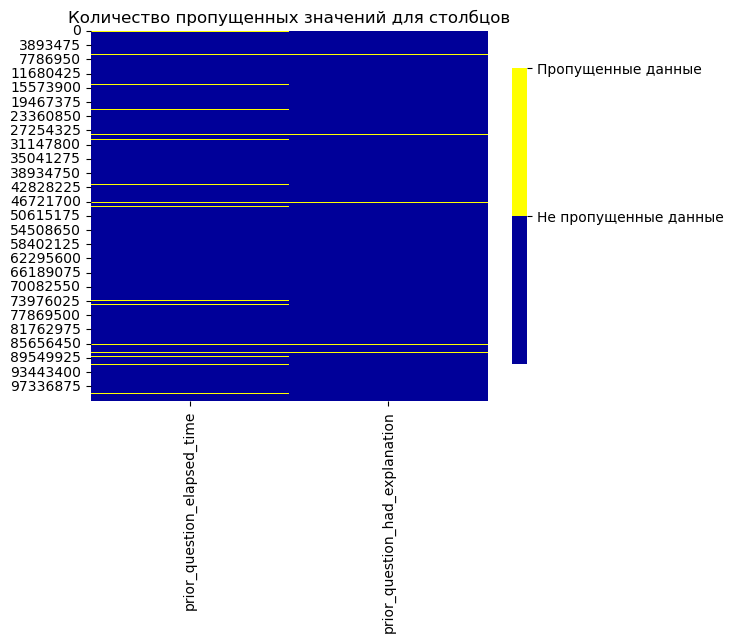

In [ ]:
# Видим что в датафрейме train_df много пустых занчей в столбцах prior_question_elapsed_time и prior_question_had_explanation
# Посмотрим подробнее
# Построим тепловую карту пропущенных значений
cols_w_none = train_df.columns[8:] #Получаем список столбцов с пропущенными значениями
# Создаем матрицу с пропущенными значениями
mask = train_df[cols_w_none].isnull()

# Создаем график

# Указываем цвец для графика
colours = ['#000099', '#ffff00'] 
sns_palette = sns.color_palette(colours)

# Построение тепловой карты
ax = sns.heatmap(mask, cmap=sns_palette, cbar_kws={"shrink": 0.8})

# Настройка цветовой шкалы
cbar = ax.collections[0].colorbar  # Получаем объект цветовой шкалы
cbar.set_ticks([0.5, 1.0])  # Устанавливаем позиции меток
cbar.set_ticklabels(['Не пропущенные данные', 'Пропущенные данные'])  # Устанавливаем текст меток

# Добавление заголовка
plt.title('Количество пропущенных значений для столбцов')

# Сохраним график
plt.savefig('charts/heatmap_missing_values.png')


In [10]:
# Построим процент пропущеных значений для наших стобцов с пропусками больлше 0
for col in cols_w_none:
    pct_missing = np.mean(train_df[col].isnull())
    # Выводим больше знаков после запятой, чтобы было нагляднее чем в отчете с ydata-profiling
    print(f'{col} - {round(pct_missing*100, 5)}%') 

prior_question_elapsed_time - 2.32296%
prior_question_had_explanation - 0.38774%


Из описания данных можно увидеть, что пропуски могут присутвовать в этих столбцах. 

> prior_question_had_explanation: (bool) Независимо от того, увидел ли пользователь объяснение и правильный ответ (ы) после ответа на предыдущий пакет вопросов, игнорируя любые лекции между ними. Значение является общим для всего одного пакета вопросов и равно null для первого пакета вопросов пользователя или лекции. Обычно первые несколько вопросов, которые видит пользователь, были частью встроенного диагностического теста, в ходе которого они не получили никакой обратной связи.

> prior_question_elapsed_time: (float32) Среднее время в миллисекундах, которое потребовалось пользователю, чтобы ответить на каждый вопрос в предыдущем наборе вопросов, игнорируя любые промежуточные лекции. Равно null для первого набора вопросов или лекции пользователя. Обратите внимание, что это среднее время, затраченное пользователем на решение каждого вопроса в предыдущем пакете.

То есть `prior_question_had_explanation` может быть null для первого пакета вопросов или лекции, это указано в описании поля. 
А поля `prior_question_elapsed_time` может быть null для первого набора вопросов или лекции пользователя, это указано в описании поля. 

Давайте проверим, что пропуски только там

In [49]:
# Фильтруем только вопросы
train_questions = train_df[train_df['content_type_id'] == 0]

# Находим первый пакет вопросов для каждого пользователя
first_question_bundle = train_questions.loc[train_questions.groupby('user_id')['timestamp'].idxmin()]

# Проверяем пропуски в первом пакете вопросов
missing_had_explanation_first = first_question_bundle['prior_question_had_explanation'].isnull().sum()
missing_elapsed_time_first = first_question_bundle['prior_question_elapsed_time'].isnull().sum()

# Проверяем пропуски для лекций
train_lectures = train_df[train_df['content_type_id'] == 1]
missing_had_explanation_lectures = train_lectures['prior_question_had_explanation'].isnull().sum()
missing_elapsed_time_lectures = train_lectures['prior_question_elapsed_time'].isnull().sum()

# Проверяем общее количество пропусков в этих столбцах
total_missing_had_explanation = train_df['prior_question_had_explanation'].isnull().sum()
total_missing_elapsed_time = train_df['prior_question_elapsed_time'].isnull().sum()

# Вывод результатов
print(f"Пропуски в prior_question_had_explanation для первого пакета: {missing_had_explanation_first}")
print(f"Пропуски в prior_question_elapsed_time для первого пакета: {missing_elapsed_time_first}")
print(f"Пропуски в prior_question_had_explanation для лекций: {missing_had_explanation_lectures}")
print(f"Пропуски в prior_question_elapsed_time для лекций: {missing_elapsed_time_lectures}")
print(f"Общее количество пропусков в prior_question_had_explanation: {total_missing_had_explanation}")
print(f"Общее количество пропусков в prior_question_elapsed_time: {total_missing_elapsed_time}")

# Сравнение для prior_question_had_explanation
if missing_had_explanation_first + missing_had_explanation_lectures == total_missing_had_explanation:
    print("Все пропуски в prior_question_had_explanation связаны с первым пакетом вопросов или лекциями.")
else:
    print("Есть пропуски в prior_question_had_explanation, не связанные с первым пакетом вопросов или лекциями.")

# Сравнение для prior_question_elapsed_time
if missing_elapsed_time_first + missing_elapsed_time_lectures == total_missing_elapsed_time:
    print("Все пропуски в prior_question_elapsed_time связаны с первым пакетом вопросов или лекциями.")
else:
    print("Есть пропуски в prior_question_elapsed_time, не связанные с первым пакетом вопросов или лекциями.")


Пропуски в prior_question_had_explanation для первого пакета: 392506
Пропуски в prior_question_elapsed_time для первого пакета: 392506
Пропуски в prior_question_had_explanation для лекций: 0
Пропуски в prior_question_elapsed_time для лекций: 1959032
Общее количество пропусков в prior_question_had_explanation: 392506
Общее количество пропусков в prior_question_elapsed_time: 2351538
Все пропуски в prior_question_had_explanation связаны с первым пакетом вопросов или лекциями.
Все пропуски в prior_question_elapsed_time связаны с первым пакетом вопросов или лекциями.


 ### Выводы по первичному анализу 

Мы видим, что есть процент пропущенных данных

Наименования признака | Процент пропусков | Количество пропусков
---------|----------|---------
 prior_question_elapsed_time | 2.32296% | 2351538
 prior_question_had_explanation | 0.38774% | 392506


Пропуски в столбцах `prior_question_elapsed_time` и `prior_question_had_explanation` связаны с:
- Первым пакетом вопросов для пользователя.
- Лекциями.

Данные достаточно полные, так как процент пропусков мал и объясним (связан с типом контента или первым пакетом вопросов)   

### Анализ 

In [50]:
# Объединение данных о вопросах
merged_questions = pd.merge(train_questions, questions_df, left_on='content_id', right_on='question_id', how='left')

# Объединение данных о лекциях
merged_lectures = pd.merge(train_lectures, lectures_df, left_on='content_id', right_on='lecture_id', how='left')

# Объединение всех данных
combined_data = pd.concat([merged_questions, merged_lectures], ignore_index=True)

In [16]:
df_info(combined_data)

Названия столбцов
Index(['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id',
       'task_container_id', 'user_answer', 'answered_correctly',
       'prior_question_elapsed_time', 'prior_question_had_explanation',
       'question_id', 'bundle_id', 'correct_answer', 'part', 'tags',
       'lecture_id', 'tag', 'type_of'],
      dtype='object')
-----------------------------------------------------------------------------------------
Описание столбцов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 18 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          uint32 
 1   timestamp                       int64  
 2   user_id                         uint32 
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answe

In [51]:
# Для оптимизации данных конвертируем все типы данных в удобные для pd.DataFrame
combined_data_optimized = combined_data.convert_dtypes()
df_info(combined_data_optimized)

Названия столбцов
Index(['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id',
       'task_container_id', 'user_answer', 'answered_correctly',
       'prior_question_elapsed_time', 'prior_question_had_explanation',
       'question_id', 'bundle_id', 'correct_answer', 'part', 'tags',
       'lecture_id', 'tag', 'type_of'],
      dtype='object')
-----------------------------------------------------------------------------------------
Описание столбцов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 18 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          UInt32 
 1   timestamp                       Int64  
 2   user_id                         UInt32 
 3   content_id                      Int16  
 4   content_type_id                 Int8   
 5   task_container_id               Int16  
 6   user_answer                     Int8   
 7   answe

In [52]:
combined_data_optimized.head(10)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part,tags,lecture_id,tag,type_of
0,0,0,115,5692,0,1,3,1,<NA>,<NA>,5692,5692,3,5,151,<NA>,<NA>,<NA>
1,1,56943,115,5716,0,2,2,1,37000,False,5716,5716,2,5,168,<NA>,<NA>,<NA>
2,2,118363,115,128,0,0,0,1,55000,False,128,128,0,1,131 149 92,<NA>,<NA>,<NA>
3,3,131167,115,7860,0,3,0,1,19000,False,7860,7860,0,1,131 104 81,<NA>,<NA>,<NA>
4,4,137965,115,7922,0,4,1,1,11000,False,7922,7922,1,1,131 149 92,<NA>,<NA>,<NA>
5,5,157063,115,156,0,5,2,1,5000,False,156,156,2,1,131 101 162 38,<NA>,<NA>,<NA>
6,6,176092,115,51,0,6,0,1,17000,False,51,51,0,1,131 187 81,<NA>,<NA>,<NA>
7,7,194190,115,50,0,7,3,1,17000,False,50,50,3,1,131 101 38,<NA>,<NA>,<NA>
8,8,212463,115,7896,0,8,2,1,16000,False,7896,7896,2,1,131 104 162 81,<NA>,<NA>,<NA>
9,9,230983,115,7863,0,9,0,1,16000,False,7863,7863,0,1,131 68 92,<NA>,<NA>,<NA>


In [9]:
# Удалим ненужные датафреймы
del questions_df, lectures_df, train_questions, train_lectures, train_df, combined_data, merged_lectures, merged_questions

CPU times: user 19.3 s, sys: 1.29 s, total: 20.6 s
Wall time: 20.6 s


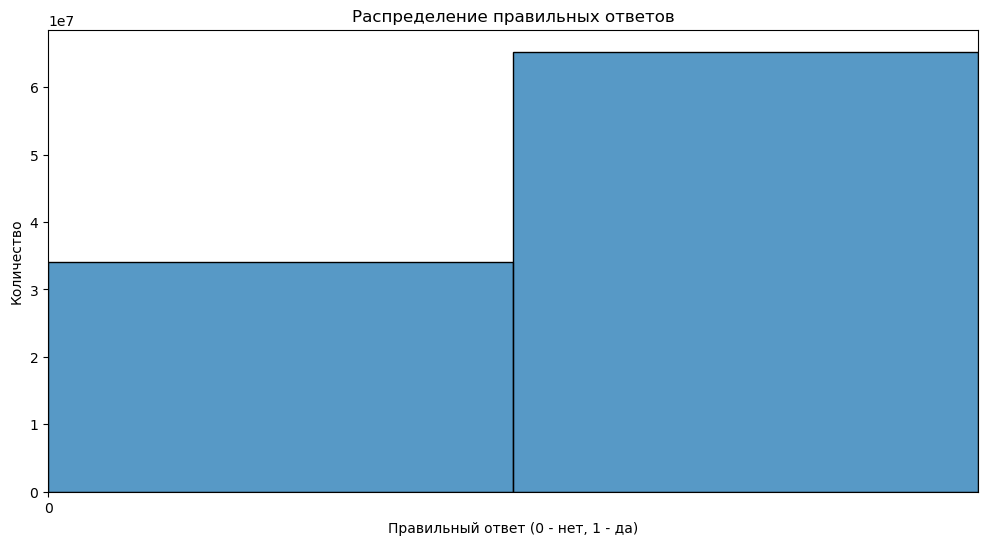

In [ ]:
%%time
# Распределение правильных ответов
# Фильтрация данных для вопросов
questions_only = combined_data_optimized[
    combined_data_optimized["content_type_id"] == 0
]
# Создаем график
fig, ax = plt.subplots(figsize=(12, 6))

# Строим гистограмму
sns.histplot(
    data=questions_only["answered_correctly"],
    bins=2,
    ax=ax,
    kde=False,
)

ax.set_xlabel("Правильный ответ (0 - нет, 1 - да)", fontsize=10)
ax.set_ylabel('Количество', fontsize=10)
ax.set_title("Распределение правильных ответов")
ax.set_xticks(np.arange(0, 1))
ax.set_xlim(0, 1)# Устанавливаем минимальное и максимальное значение

# Сохраняем график распределения правильных ответов
plt.savefig("charts/distribution_correct_answers.png", dpi=300)

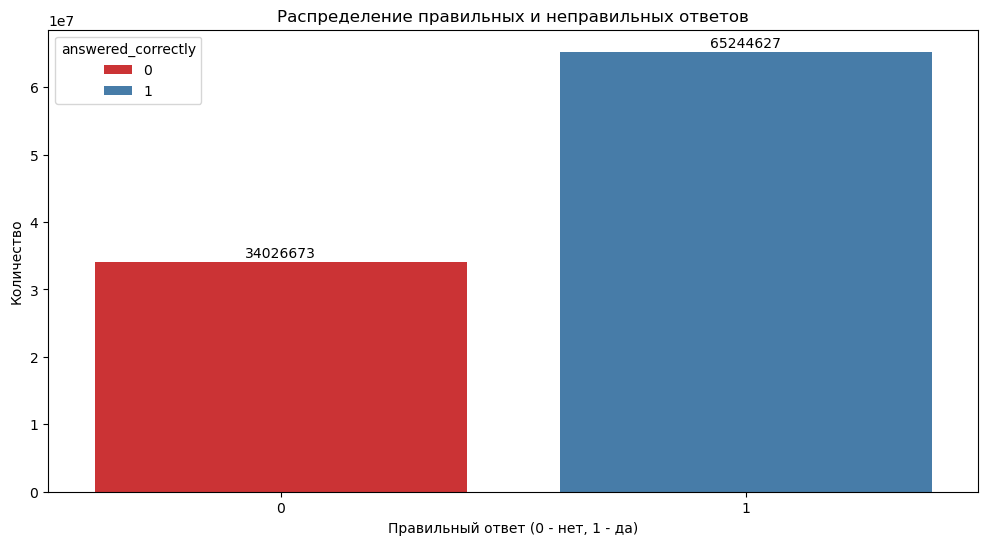

In [15]:
# Подсчет количества правильных и неправильных ответов
answer_counts = questions_only['answered_correctly'].value_counts().sort_index()

# Создаем график
fig, ax = plt.subplots(figsize=(12, 6))

# Строим barplot
sns.barplot(
    x=answer_counts.index,
    y=answer_counts.values,
    ax=ax,
    hue=answer_counts.index,
    palette='Set1'
)

ax.set_xlabel("Правильный ответ (0 - нет, 1 - да)", fontsize=10)
ax.set_ylabel('Количество', fontsize=10)
ax.set_title("Распределение правильных и неправильных ответов")

# Добавляем количество над столбцами
for i, count in enumerate(answer_counts.values):
    ax.text(i, count + max(answer_counts.values) * 0.01, f'{count}', ha='center', fontsize=10)

# Сохраняем график
plt.savefig("charts/distribution_correct_answers_barplot.png", dpi=300)

In [16]:
# Подсчет количества уникальных студентов
unique_students = combined_data_optimized['user_id'].nunique()

print(f'Количество уникальных студентов: {unique_students}')

Количество уникальных студентов: 393656


In [17]:
# Группировка данных по user_id и подсчет количества вопросов
questions_per_student = combined_data_optimized[combined_data_optimized['content_type_id'] == 0].groupby('user_id')['content_id'].count().reset_index()
questions_per_student.rename(columns={'content_id': 'questions_answered'}, inplace=True)

In [18]:
# Группировка данных по user_id и расчет процента правильных ответов
correct_percentage_per_student = combined_data_optimized[combined_data_optimized['content_type_id'] == 0].groupby('user_id')['answered_correctly'].mean().reset_index()
correct_percentage_per_student.rename(columns={'answered_correctly': 'correct_answer_percentage'}, inplace=True)

In [19]:
# Группировка данных по user_id и расчет среднего времени ответа
average_time_per_student = combined_data_optimized[combined_data_optimized['content_type_id'] == 0].groupby('user_id')['prior_question_elapsed_time'].mean().reset_index()
average_time_per_student.rename(columns={'prior_question_elapsed_time': 'average_time'}, inplace=True)

In [20]:
# Объединение всех метрик в один DataFrame
student_metrics = questions_per_student.merge(correct_percentage_per_student, on='user_id')
student_metrics = student_metrics.merge(average_time_per_student, on='user_id')

student_metrics.head()

,user_id,questions_answered,correct_answer_percentage,average_time
0,115,46,0.695652,19933.311111
1,124,30,0.233333,18793.0
2,2746,19,0.578947,18055.555556
3,5382,125,0.672,36048.387097
4,8623,109,0.642202,26107.407407


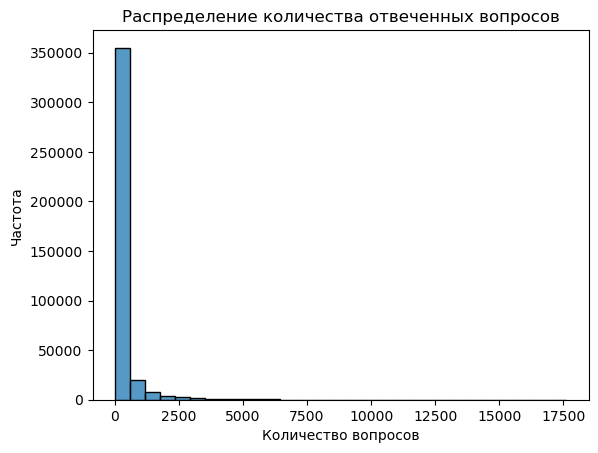

In [21]:
# Гистограмма для количества отвеченных вопросов
sns.histplot(student_metrics['questions_answered'], bins=30)
plt.title('Распределение количества отвеченных вопросов')
plt.xlabel('Количество вопросов')
plt.ylabel('Частота')

# Сохраняем график
plt.savefig('charts/distribution_questions_answered.png', dpi=300)

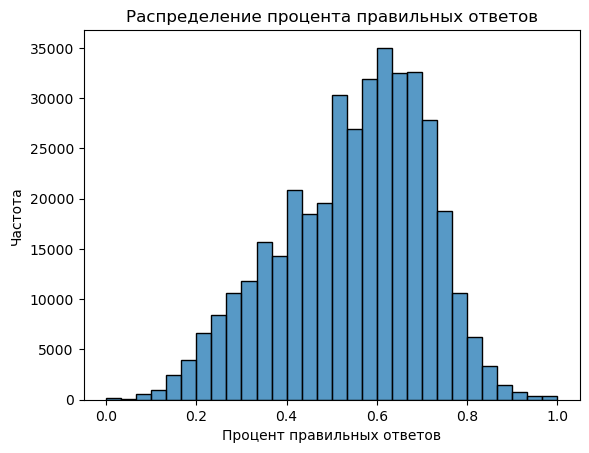

In [22]:
# Гистограмма для процента правильных ответов
sns.histplot(student_metrics['correct_answer_percentage'], bins=30)
plt.title('Распределение процента правильных ответов')
plt.xlabel('Процент правильных ответов')
plt.ylabel('Частота')

# Сохраняем график
plt.savefig('charts/distribution_correct_answer_percentage.png', dpi=300)

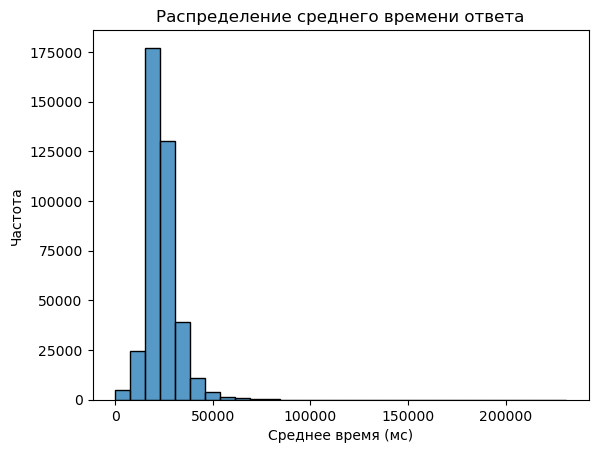

In [23]:
# Гистограмма для среднего времени ответа
sns.histplot(student_metrics['average_time'], bins=30)
plt.title('Распределение среднего времени ответа')
plt.xlabel('Среднее время (мс)')
plt.ylabel('Частота')

# Сохраняем график
plt.savefig('charts/distribution_average_time.png', dpi=300)

In [32]:
# Корреляционная матрица
correlation_matrix = student_metrics[['questions_answered', 'correct_answer_percentage', 'average_time']].corr()
print(correlation_matrix)

                           questions_answered  correct_answer_percentage  \
questions_answered                   1.000000                   0.235403   
correct_answer_percentage            0.235403                   1.000000   
average_time                         0.065677                   0.006962   

                           average_time  
questions_answered             0.065677  
correct_answer_percentage      0.006962  
average_time                   1.000000  


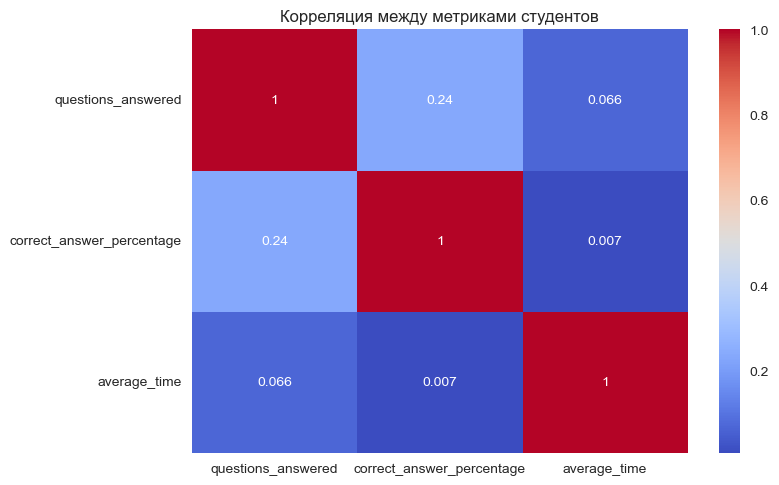

In [33]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляция между метриками студентов')

# Сохраняем график
plt.savefig('charts/correlation_matrix_time_correct.png', dpi=300)

Видно что самая большая корреляция между временем и процентом правильных ответов.

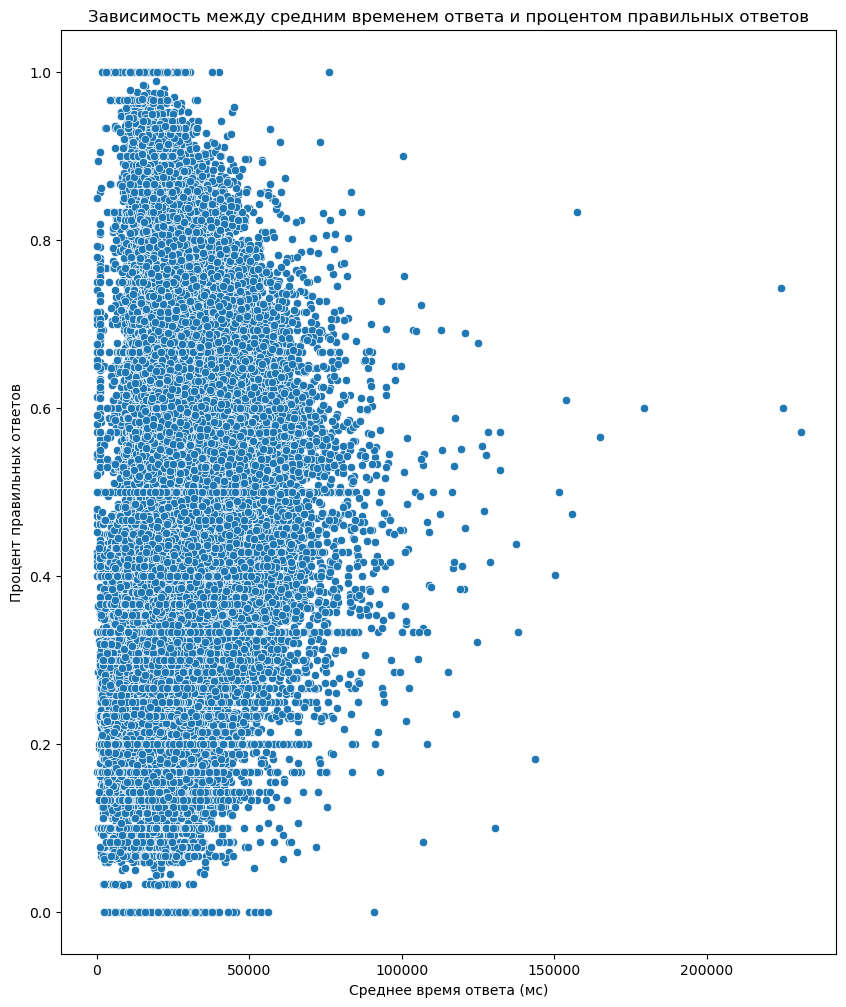

In [29]:
plt.figure(figsize=(10, 12))
sns.scatterplot(x='average_time', y='correct_answer_percentage', data=student_metrics)
plt.title('Зависимость между средним временем ответа и процентом правильных ответов')
plt.xlabel('Среднее время ответа (мс)')
plt.ylabel('Процент правильных ответов')

# Сохраняем график
plt.savefig('charts/scatterplot_time_correct.png', dpi=300)

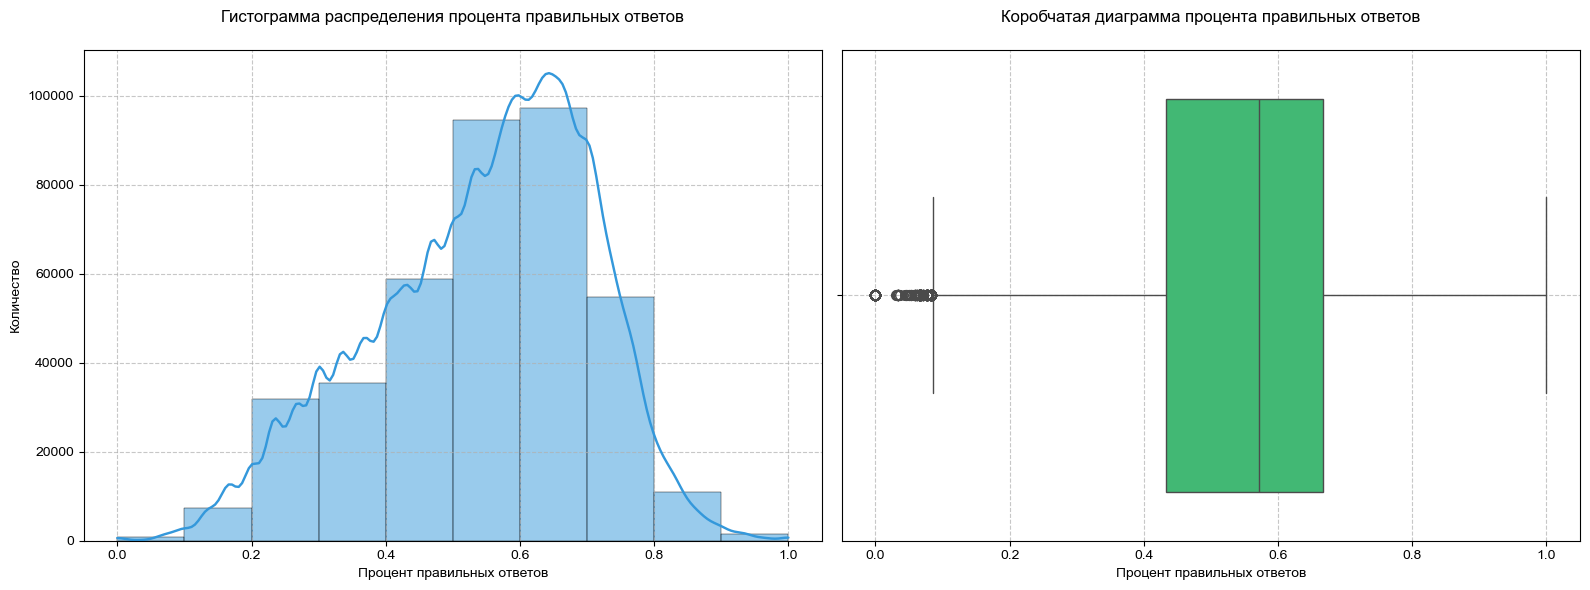

In [31]:
# Создаем фигуру с двумя графиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Настраиваем стиль
plt.style.use('seaborn-v0_8')
colors = {'hist': '#3498db', 'kde': '#2ecc71', 'box': '#2ecc71'}

# Строим гистограмму с KDE
sns.histplot(data=student_metrics['correct_answer_percentage'], 
             bins=10, 
             kde=True, 
             color=colors['hist'],
             ax=ax1)

# Настройка первого графика
ax1.set_title('Гистограмма распределения процента правильных ответов', pad=20, fontsize=12)
ax1.set_xlabel('Процент правильных ответов', fontsize=10)
ax1.set_ylabel('Количество', fontsize=10)
ax1.grid(True, linestyle='--', alpha=0.7)

# Строим коробчатую диаграмму
sns.boxplot(x=student_metrics['correct_answer_percentage'], 
            color=colors['box'], 
            ax=ax2)

# Настройка второго графика
ax2.set_title('Коробчатая диаграмма процента правильных ответов', pad=20, fontsize=12)
ax2.set_xlabel('Процент правильных ответов', fontsize=10)
ax2.grid(True, linestyle='--', alpha=0.7)

# Общие настройки
plt.tight_layout()

# Сохраняем графики
plt.savefig('charts/histogram_and_boxplot.png', dpi=300)

In [37]:
# Сортировка по количеству отвеченных вопросов в убывающем порядке
top_questions_answered = student_metrics.sort_values(by='questions_answered', ascending=False)

# Вывод топ-5 студентов по количеству отвеченных вопросов
top_questions_answered.head(10)

,user_id,questions_answered,correct_answer_percentage,average_time
145895,801103753,17609,0.721109,37555.862108
270365,1478712595,16842,0.76238,21166.339588
83208,455973631,16640,0.771635,20323.92764
337432,1842816145,16533,0.791508,32221.503085
319095,1743444187,16424,0.769849,41646.835048
303898,1660941992,16409,0.573953,63566.464956
191252,1047202059,16169,0.80611,21564.791564
393406,2146130037,16162,0.71699,16140.41959
295612,1615528747,15978,0.856052,23579.096576
61749,338684437,15859,0.845955,27143.964119


In [38]:
# Сортировка по проценту правильных ответов в убывающем порядке
top_correct_percentage = student_metrics.sort_values(by='correct_answer_percentage', ascending=False)

# Топ-5 студентов по проценту правильных ответов
top_correct_percentage.head(10)

,user_id,questions_answered,correct_answer_percentage,average_time
60248,330468231,20,1.0,22842.105263
191334,1047583968,14,1.0,15769.230769
244230,1335560704,13,1.0,20916.666667
274494,1501579952,12,1.0,7727.272727
258507,1413146787,3,1.0,23000.0
298831,1633052612,15,1.0,17071.428571
118124,647540505,30,1.0,9482.586207
39071,214452166,13,1.0,15000.0
108634,594429989,1,1.0,<NA>
106357,582204246,30,1.0,23746.965517


In [39]:
# Подсчет уникальных пакетов вопросов
total_question_packages = combined_data_optimized['task_container_id'].nunique()

# Фильтрация данных для вопросов
questions_only = combined_data_optimized[combined_data_optimized['content_type_id'] == 0]

# Группировка по пакетам вопросов и расчет среднего процента правильных ответов
correct_answers_by_package = questions_only.groupby('task_container_id')['answered_correctly'].mean().reset_index()
correct_answers_by_package.rename(columns={'answered_correctly': 'correct_answer_rate'}, inplace=True)

# Сортировка по проценту правильных ответов
sorted_packages = correct_answers_by_package.sort_values(by='correct_answer_rate', ascending=False)

# Вывод 
print(f'Всего пакетов вопросов: {total_question_packages}')
print("Топ-5 пакетов вопросов с самым высоким процентом правильных ответов:")
sorted_packages.head(5)

Всего пакетов вопросов: 10000
Топ-5 пакетов вопросов с самым высоким процентом правильных ответов:


,task_container_id,correct_answer_rate
9872,9872,0.837838
9393,9393,0.831169
9811,9811,0.82199
9741,9741,0.819095
9729,9729,0.817352


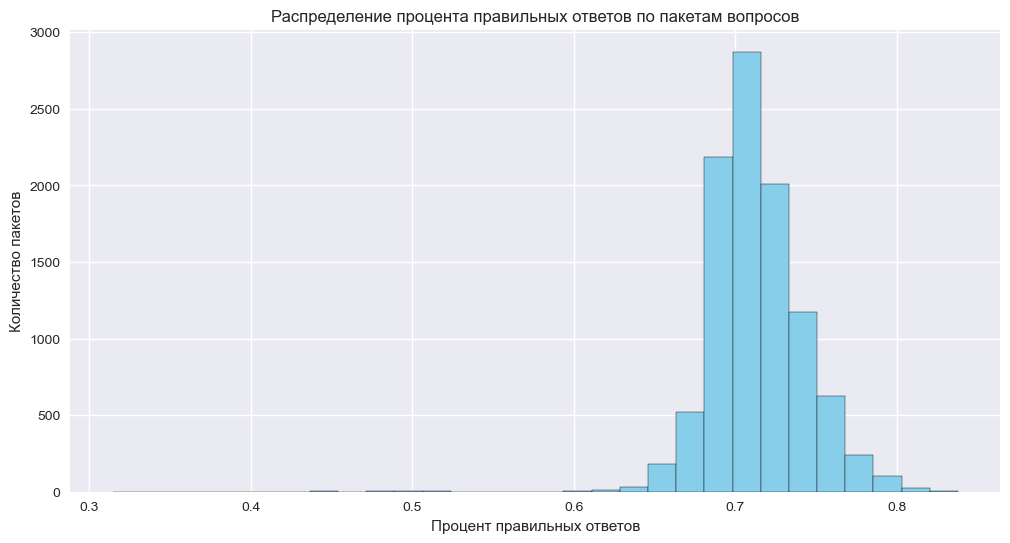

In [40]:
plt.figure(figsize=(12, 6))
plt.hist(correct_answers_by_package['correct_answer_rate'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение процента правильных ответов по пакетам вопросов')
plt.xlabel('Процент правильных ответов')
plt.ylabel('Количество пакетов')

# Сохраняем графики
plt.savefig('charts/distribution_correct_answer_rate_by_package.png', dpi=300)

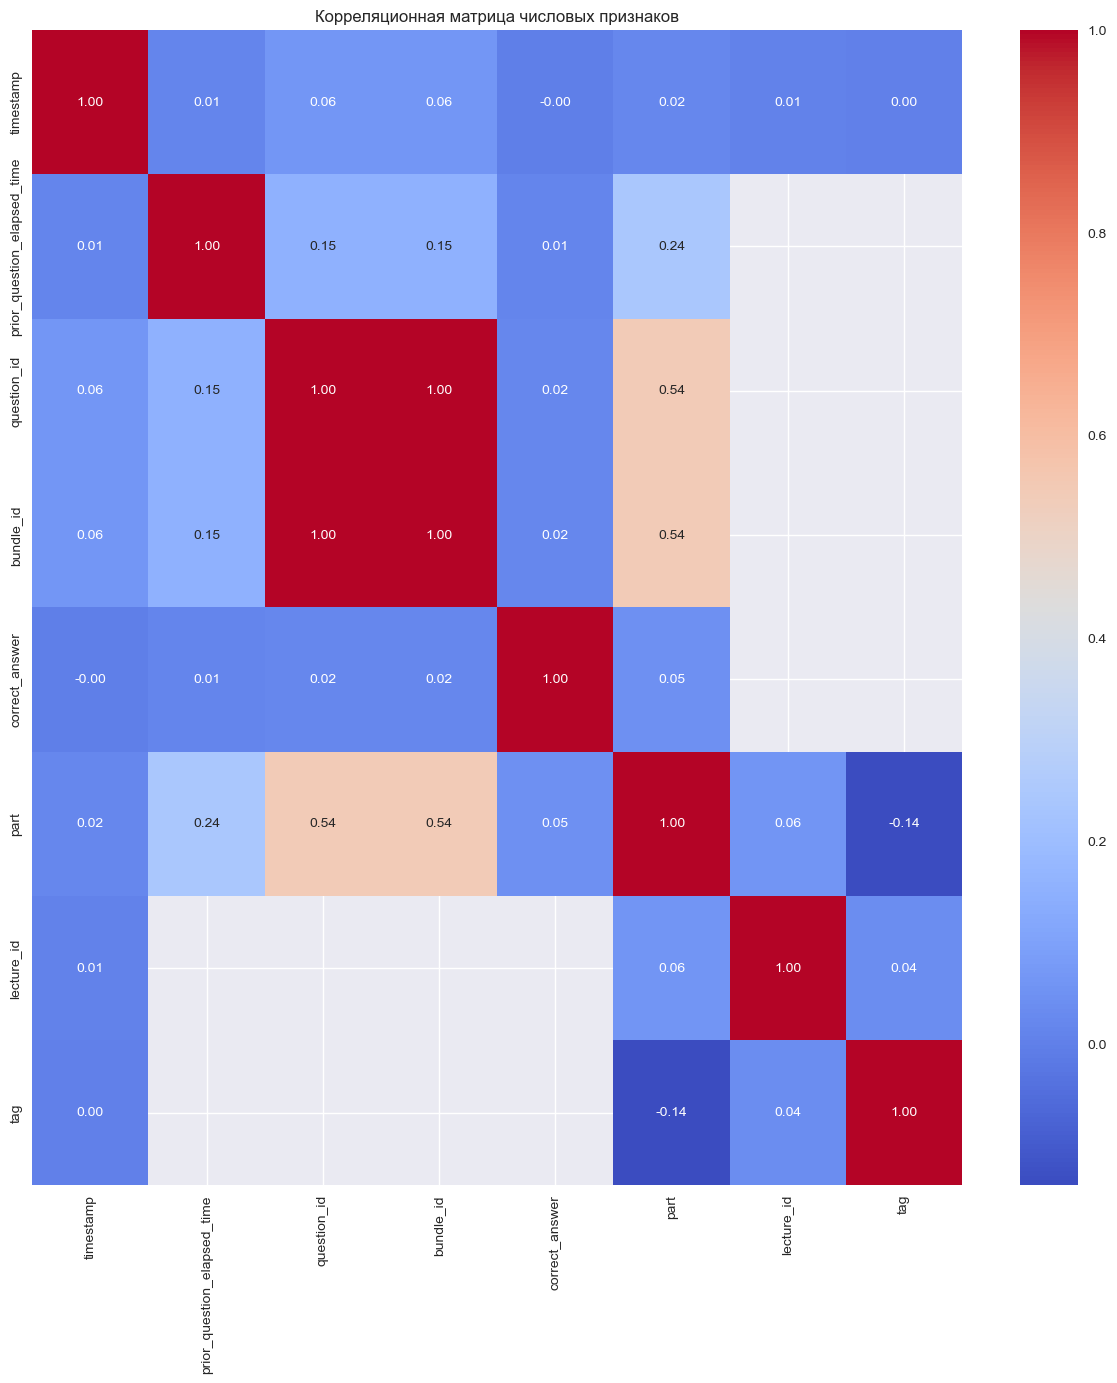

In [43]:
# Построение корреляционной матрицы
numeric_columns = combined_data_optimized.select_dtypes(include=['int', 'float']).columns
correlation_matrix = combined_data_optimized[numeric_columns].corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляционная матрица числовых признаков')

# Сохраняем графики
plt.savefig('charts/correlation_matrix_numeric_columns.png', dpi=300)